In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
train_df=pd.read_csv("C:/Users/Srinivasa Rao/Desktop/ds_projects/Predicting Patient Stay/data/train.csv", index_col="case_id")

In [7]:
train_df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20


In [13]:
train_df.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [27]:
train_df["Hospital_type_code"].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [28]:
train_df["Hospital_region_code"].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [29]:
train_df["Department"].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [30]:
train_df["Ward_Type"].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [31]:
train_df["Ward_Facility_Code"].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [32]:
train_df["Type of Admission"].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [33]:
train_df["Severity of Illness"].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [34]:
train_df["Age"].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [35]:
train_df["Stay"].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [36]:
num_encode={"Hospital_type_code":{"a":1,"b":2,"c":3,"d":4,"e":5,"f":6,"g":7},
            "Hospital_region_code":{"X":1,"Y":2,"Z":3},
            "Department":{"gynecology":1,"anesthesia":2,"radiotherapy":3,"TB & Chest disease":4,"surgery":5},
            "Ward_Type":{"P":1,"Q":2,"R":3,"S":4,"T":5,"U":6},
            "Ward_Facility_Code":{"A":1,"B":2,"C":3,"D":4,"E":5,"F":6},
            "Type of Admission":{"Trauma":1,"Emergency":2,"Urgent":3},
            "Severity of Illness":{"Moderate":1,"Minor":2,"Extreme":3},
           }

In [37]:
train_df.replace(num_encode,inplace=True)
train_df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,3,3,3,3,3,3,6,2.0,31397,7.0,2,3,2,51-60,4911.0,0-10
2,2,3,5,3,2,3,4,6,2.0,31397,7.0,1,3,2,51-60,5954.0,41-50
3,10,5,1,1,2,2,4,5,2.0,31397,7.0,1,3,2,51-60,4745.0,31-40
4,26,2,2,2,2,3,3,4,2.0,31397,7.0,1,3,2,51-60,7272.0,41-50
5,26,2,2,2,2,3,4,4,2.0,31397,7.0,1,3,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,1,6,1,3,3,2,6,4.0,86499,23.0,2,1,3,41-50,4144.0,11-20
318435,24,1,1,1,2,2,2,5,4.0,325,8.0,3,1,4,81-90,6699.0,31-40
318436,7,1,4,1,3,1,3,6,4.0,125235,10.0,2,2,3,71-80,4235.0,11-20


In [40]:
corr= train_df.corr()

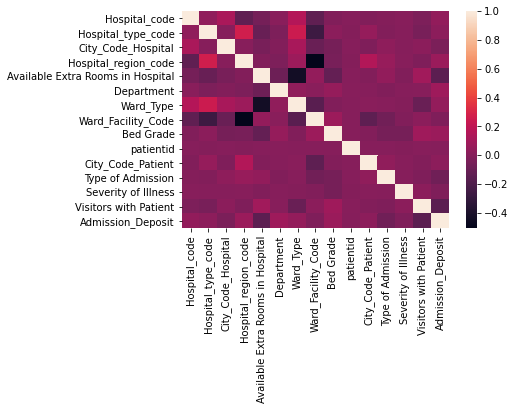

In [41]:
sns.heatmap(corr)

In [45]:
train_df.dtypes

Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Hospital_region_code                   int64
Available Extra Rooms in Hospital      int64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object